In [66]:
import numpy as np

In [64]:
from gensim.models import Doc2Vec
import pandas as pd 
import matplotlib.pyplot as plt

model = Doc2Vec.load("d2v.model")
raw_df = pd.read_csv('vectorized_data.zip')

In [65]:
df = raw_df.iloc[:, -20:]

## Similar documents

In [35]:
sim_doc = model.dv.most_similar("5")
sim_doc

[('96001', 0.8309081196784973),
 ('76688', 0.8223080635070801),
 ('45023', 0.7999747395515442),
 ('137700', 0.7936275005340576),
 ('15112', 0.7921205759048462),
 ('145013', 0.7831253409385681),
 ('21614', 0.7827600836753845),
 ('162970', 0.7775760293006897),
 ('117273', 0.7775026559829712),
 ('112329', 0.7766830325126648)]

In [37]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
print(df[df.index == 5]['Poll Responses Response'])
print(df[df.index == 96001]['Poll Responses Response'])
print(df[df.index == 76688]['Poll Responses Response'])
print(df[df.index == 45023]['Poll Responses Response'])



5    We neologised the term "caveception", meaning that even if we leave a cave, we might be stuck in concentric circles of many caves, never knowing the point at which we have left all caves. Knowledge-like numbers where we dont know what the last number is- is infinite: so do we ever leave the cave? 
Name: Poll Responses Response, dtype: object
96001    Utopia is an imagined community where is located in a remote area with no inhabitants. From the sentence in the poem "roads that offer access", the word access suppose to have a netural meaning, whereas here is a positive connotation that even generalize the concept of road to a access to help. The access could be social access to problem solving or simply a road leading to another position. In the last part of the poem, it said, for all its claims, the island is uninhabited, means it's an imagined community.
Name: Poll Responses Response, dtype: object
76688    Utopia' is this dream world/ society of perfect order and absolute sanity

## Similar words

In [49]:
print(model.wv.most_similar("difficult"), '\n')
print(model.wv.most_similar("happy"), '\n')
print(model.wv.most_similar("company"), '\n')
print(model.wv.most_similar("hypothesis"), '\n')
print(model.wv.most_similar("dog"), '\n')

[('hard', 0.9377090334892273), ('harder', 0.8900715112686157), ('epestemolog', 0.8895019888877869), ('easi', 0.8805145025253296), ('imposs', 0.8601112961769104), ('easili', 0.8538097739219666), ('fulli', 0.853760302066803), ('wish', 0.8453180193901062), ('worthwhil', 0.8329426050186157), ('deep', 0.8296334743499756)] 

[('staffer', 0.7997063398361206), ('liscens', 0.7953089475631714), ('delay', 0.7899806499481201), ('junkyard', 0.7879964113235474), ('crime', 0.7833148837089539), ('whenc', 0.7804534435272217), ('dearest', 0.779988706111908), ('extravas', 0.7782473564147949), ('instant', 0.7742785811424255), ('clubbish', 0.7727620005607605)] 

[('on', 0.8309007287025452), ('rawls', 0.8246819972991943), ('would', 0.8115485310554504), ('should', 0.8091741800308228), ('you', 0.8054302334785461), ('cspw', 0.8036788105964661), ('could', 0.7977544665336609), ('they', 0.7841722965240479), ('undernourishment', 0.7817638516426086), ('there', 0.781522810459137)] 

[('superstructur', 0.816364467144

Does the word needs to be in my documents?

## PCA

In [69]:
X=model[model.wv.index_to_key]

#Computing the correlation matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)

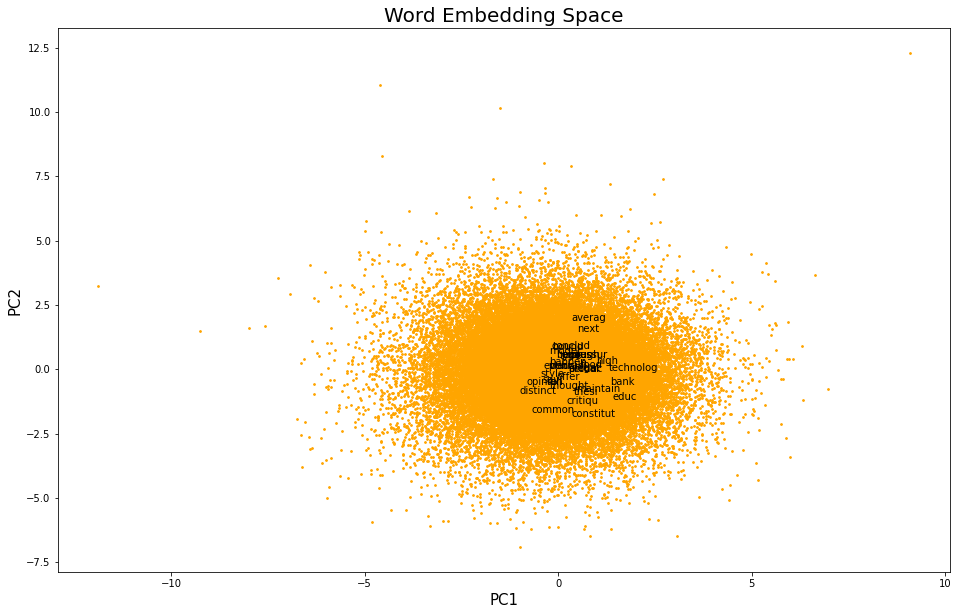

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.scatter(neww_X[:,0],neww_X[:,1],s=3,color='orange')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(model.wv.index_to_key[:1000])
for i, word in enumerate(vocab):
  if i % 30 == 0:
    plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]), size = 10)

If a two-dimensional PCA graph of a dataset has a single, large cluster, it means that the majority of the data points are very similar to each other in terms of their feature values. This can be interpreted as meaning that the data has a low level of variability or spread across the two dimensions represented in the graph.

This suggests that the data may be highly correlated or redundant in the original feature space, and that the PCA may not have effectively reduced the dimensionality of the data.

In [51]:
model.wv.index_to_key

['becaus',
 'one',
 'differ',
 'make',
 'exampl',
 'think',
 'peopl',
 'like',
 'time',
 'activ',
 'need',
 'way',
 'effect',
 'chang',
 'understand',
 'help',
 'us',
 'mean',
 'valu',
 'system',
 'data',
 'problem',
 'first',
 'group',
 'import',
 'case',
 'work',
 'point',
 'level',
 'onli',
 'model',
 'take',
 'x',
 'may',
 'get',
 'see',
 'base',
 'howev',
 'look',
 'veri',
 'state',
 'creat',
 'two',
 'variabl',
 'inform',
 'discuss',
 'good',
 'increas',
 'class',
 'compani',
 'find',
 'argument',
 'well',
 'process',
 'sinc',
 'result',
 'relat',
 'show',
 'e',
 'specif',
 'even',
 'person',
 'consid',
 'product',
 'mani',
 'want',
 'better',
 'tri',
 'individu',
 'know',
 'number',
 'market',
 'idea',
 'give',
 'lead',
 'much',
 'order',
 'function',
 'question',
 'go',
 'studi',
 'possibl',
 'doe',
 'right',
 'probabl',
 'new',
 'social',
 'allow',
 'countri',
 'thus',
 'high',
 'p',
 'factor',
 'abl',
 'caus',
 'theori',
 'decis',
 'test',
 'evid',
 'solut',
 'b',
 'focus',
 

In [4]:
# Access the KeyedVectors object
keyed_vectors = model.wv

# Access the vocabulary words and their index
vocab_words = list(keyed_vectors.index_to_key)
vocab_indices = list(keyed_vectors.key_to_index.values())

# Access the vector representations of the vocabulary words
vocab_vectors = [keyed_vectors.get_vecattr(word, "vectors") for word in vocab_words]


KeyError: 'vectors'

In [12]:
model.dv[0]


array([ 2.9182043 ,  1.1194984 ,  1.3189455 ,  0.4664749 , -0.7483215 ,
       -5.205838  , -0.79226655,  1.2796005 ,  1.6811768 ,  1.5106323 ,
        2.3258588 ,  2.3328567 , -0.6714971 , -0.18677452,  6.032318  ,
        1.689442  ,  2.4898086 ,  0.42651814,  0.48574618, -0.8213973 ],
      dtype=float32)